In [1]:
#import libraries
import numpy as np #arrays functions (pandas ka baap)
import pandas as pd #statistical analysis
import matplotlib.pyplot as plt #data visualisation (graphs and plots; built on R)
import seaborn as sns #data visualisation (numpy:pandas::pyplot:seaborn)
import random

%matplotlib inline

In [2]:
#Load Dataset
df = pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#Check empty sets
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df['male'] = (df['Sex']=='male')
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

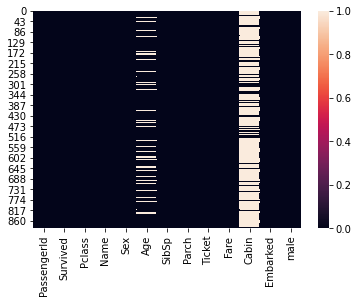

In [5]:
sns.heatmap(df.isnull())

C:\Users\hites\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

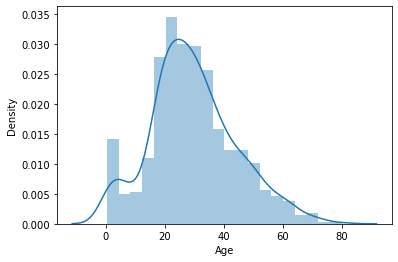

In [6]:
sns.distplot(df['Age'],bins=20)

We can clearly see that we have an almost normal distribution of age values. (Gaussian distribution)

Normal Distribution:

- Certain algorithms work well only with normal distributions.
- For example, Linear and Logistic Regression work very well with such a distribution.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

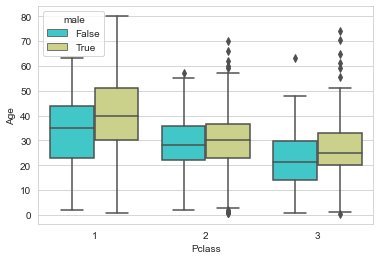

In [7]:
sns.set_style("whitegrid")
sns.boxplot(y=df['Age'].dropna(), x=df['Pclass'], hue=df['male'], palette='rainbow')

C:\Users\hites\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

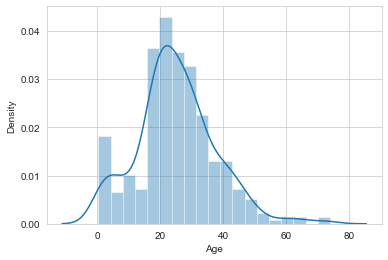

In [8]:
sns.distplot(df[df['Pclass']==3]['Age'])

As is visible, the Pclass of a person, their gender and their age are quite related. We can directly add the mean age of a gender and class to the missing values without affecting the accuracy of the data too much.

In [9]:
def age_imputing(cols):
    Age = cols[0]
    Pclass = cols[1]
    Male = cols[2]
    
    if pd.isnull(Age):
        if Pclass == 1:
            if Male:
                return 40
            else:
                return 36
        elif Pclass == 2:
            if Male:
                return 30
            else:
                return 28
        else:
            if Male:
                return 25
            else:
                return 21
    else:
        return Age
    
df['Age'] = df[['Age','Pclass','male']].apply(age_imputing,axis=1)

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.098956,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.323203,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
male             0
dtype: int64

We have successfully imputed the age column by replacing the values based on sex and pclass. We can still see that the Cabin column has most values missing. We must drop the column because it is almost useless to us.

In [12]:
df.drop('Cabin',axis=1,inplace=True)

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
male           0
dtype: int64

We still need to impute the embarked column. Since we have only 2 missing values, we can easily impute this one.

In [14]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [15]:
uni_emb = ['S','C','Q']
df['Embarked'].fillna(random.choice(uni_emb),inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
male           0
dtype: int64

We have successfully imputed the dataframe's null values and are now ready to proceed further.

In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,W./C. 6607,23.4500,S,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,True


All the categorical columns are: Survived, Pclass, Sex, male, Embarked\
All the numeric columns are: Parch, SibSp\
All the ranged columns are: Fare, Age,

In [17]:
df['Family'] = df['Parch']+df['SibSp']

In [18]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,True,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,False,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,W./C. 6607,23.4500,S,False,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,True,0


<AxesSubplot:xlabel='Pclass', ylabel='count'>

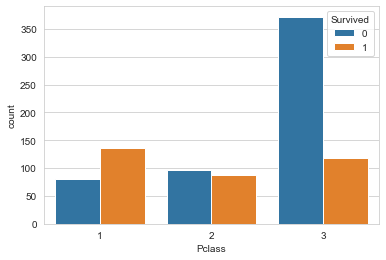

In [19]:
sns.countplot(x=df['Pclass'],hue=df['Survived'])

More people from class 1 survived (almost 2:3). Fewer survived from class 2 (almost 1:1). And least survived from class 3 (almost 4:1).

In [20]:
Pclass = [1,2,3]
for i in Pclass:
    survived = df[(df['Pclass'] == i) & (df['Survived'] == 1)]['Sex'].count()
    died = df[(df['Pclass'] == i) & (df['Survived'] == 0)]['Sex'].count()
    print(f'Ratio of deaths in class {i}: {died/(survived+died)*100}%')

Ratio of deaths in class 1: 37.03703703703704%
Ratio of deaths in class 2: 52.71739130434783%
Ratio of deaths in class 3: 75.76374745417516%


<AxesSubplot:xlabel='Sex', ylabel='count'>

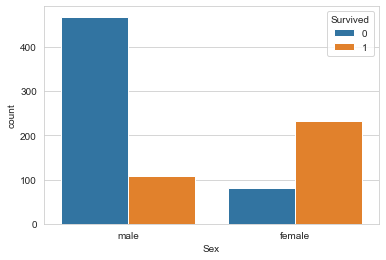

In [21]:
sns.countplot(x=df['Sex'], hue=df['Survived'])

More females survived (almost 3:1). Less males survived (almost 1:4)

<AxesSubplot:xlabel='Family', ylabel='count'>

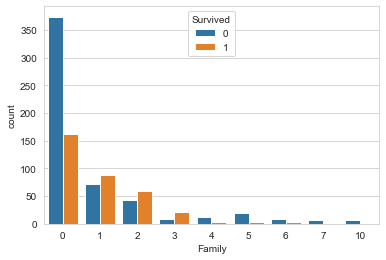

In [22]:
sns.countplot(x=df['Family'], hue=df['Survived'])

We can clearly see that less people survived with family sizes more than 4 or who were alone.

In [23]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,True,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,False,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,W./C. 6607,23.4500,S,False,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,True,0


In [24]:
df['male'] = df['male'].apply(lambda x:int(x))
df = pd.concat([df, pd.get_dummies(df['Embarked'], drop_first=True)], axis=1)
df.drop(columns=['PassengerId', 'Name', 'Sex', 'Ticket', 'SibSp', 'Parch', 'Embarked'], inplace=True, axis=1)
df

,Survived,Pclass,Age,Fare,male,Family,Q,S
0,0,3,22.0,7.2500,1,1,0,1
1,1,1,38.0,71.2833,0,1,0,0
2,1,3,26.0,7.9250,0,0,0,1
3,1,1,35.0,53.1000,0,1,0,1
4,0,3,35.0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,1,0,0,1
887,1,1,19.0,30.0000,0,0,0,1
888,0,3,21.0,23.4500,0,3,0,1
889,1,1,26.0,30.0000,1,0,0,0


<AxesSubplot:>

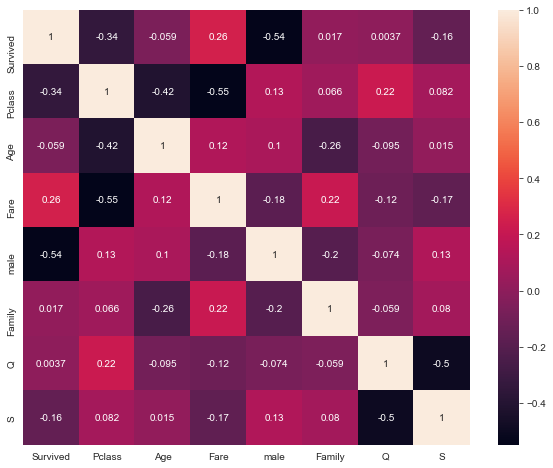

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import classification_report

x_train, x_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1), df['Survived'], test_size=0.3, random_state=72)
lm = LR()
lm.fit(x_train, y_train)
preD = lm.predict(x_test)
print(classification_report(y_test,preD))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       169
           1       0.76      0.79      0.78        99

    accuracy                           0.83       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268



C:\Users\hites\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
